# Imports and data reads

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# user data
with open("/content/u.user", "r", encoding="latin1") as f:
    user_data = f.readlines()

# item data
with open("/content/u.item", "r", encoding="latin1") as f:
    item_data = f.readlines()

# genre data
with open("/content/u.genre", "r", encoding="latin1") as f:
    genre_data = f.readlines()

# rating data
with open("/content/u.data", "r", encoding="latin1") as f:
    rating_data = f.readlines()

for i in [user_data, item_data, genre_data, rating_data]:
    print(i[:5])

['1|24|M|technician|85711\n', '2|53|F|other|94043\n', '3|23|M|writer|32067\n', '4|24|M|technician|43537\n', '5|33|F|other|15213\n']
['1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0\n', '2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0\n', '3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0\n', '4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0\n', '5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0\n']
['unknown|0\n', 'Action|1\n', 'Adventure|2\n', 'Animation|3\n', "Children's|4\n"]
['196\t242\t3\t881250949\n', '186\t302\t3\t891717742\n', '22\t377\t1\t878887116\n', '244\t51\t2\t880606923\n', '166\t346\t1\t886397596\n']


# User analysis

In [ ]:
users = [[], [], []]
for line in user_data:
    line = line[:-1].split('|')
    for i in range(3):
        users[i].append(line[i+1])
[print(x) for x in users]

## Number of users by age and sex


<function matplotlib.pyplot.show(close=None, block=None)>

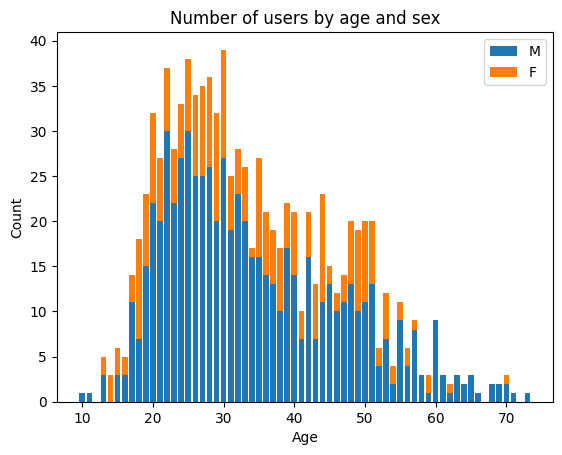

<Figure size 1500x500 with 0 Axes>

In [41]:
sex_counts = {'M': [0]*64, 'F':[0]*64}
for a, s in zip(users[0], users[1]):
    sex_counts[s][int(a)-10] += 1

fig, ax = plt.subplots()
bottom = np.zeros(64)

plt.figure(figsize=(15, 5))
for s, v in sex_counts.items():
    p = ax.bar(range(10, 74), v, label=s, bottom=bottom)
    bottom += v
ax.set_title("Number of users by age and sex")
ax.set(xlabel="Age", ylabel="Count")
ax.legend()
plt.show

## Number of users by job and sex

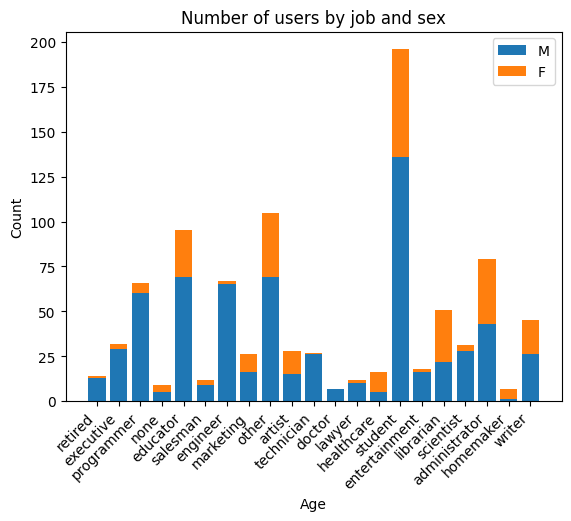

<Figure size 2000x500 with 0 Axes>

In [97]:
jobs = list(set(users[2]))
jobs_cat2idx = {k: v for v, k in enumerate(jobs)}
jobs_idx2cat = {v: k for k, v in jobs_cat2idx.items()}
jobs = [jobs_idx2cat[i] for i in range(21)]
n_jobs = len(jobs)
sex_counts = {'M': [0]*n_jobs, 'F': [0]*n_jobs}
for j, s in zip(users[2], users[1]):
    sex_counts[s][jobs_cat2idx[j]] += 1

fig, ax = plt.subplots()
bottom = np.zeros(21)
for s, v in sex_counts.items():
    p = ax.bar(jobs, v, label=s, bottom=bottom)
    bottom += v
ax.set_title("Number of users by job and sex")
ax.set(xlabel="Age", ylabel="Count", autoscale_on=True)
ax.set_xticks(range(21), jobs, rotation=45, ha='right')
ax.legend()
plt.show()

## User's age by job

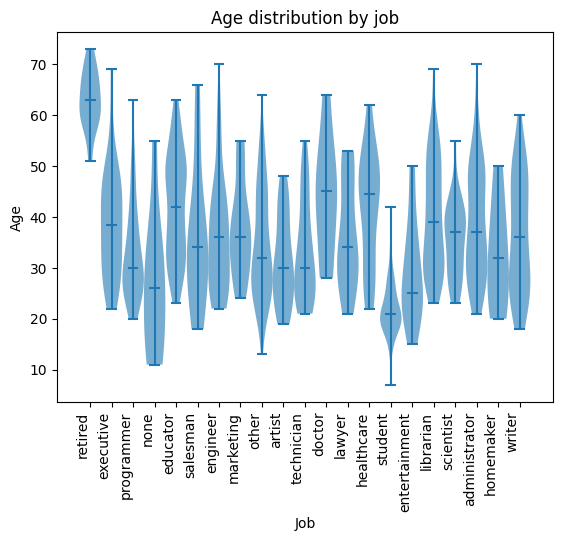

In [109]:
jobs_counts = []
for i in range(21): jobs_counts.append([])

for a, j in zip(users[0], users[2]):
    jobs_counts[jobs_cat2idx[j]].append(int(a))


fig, ax = plt.subplots()
vp = ax.violinplot(jobs_counts, list(range(21)), widths=1, showmedians=True)
ax.set_xticks(range(21), jobs, rotation=90, ha='right')
ax.set_title("Age distribution by job")
ax.set(xlabel="Job", ylabel="Age")
# styling:
for body in vp['bodies']:
    body.set_alpha(0.6)

plt.show()

# Movies analysis

## Genres popularity

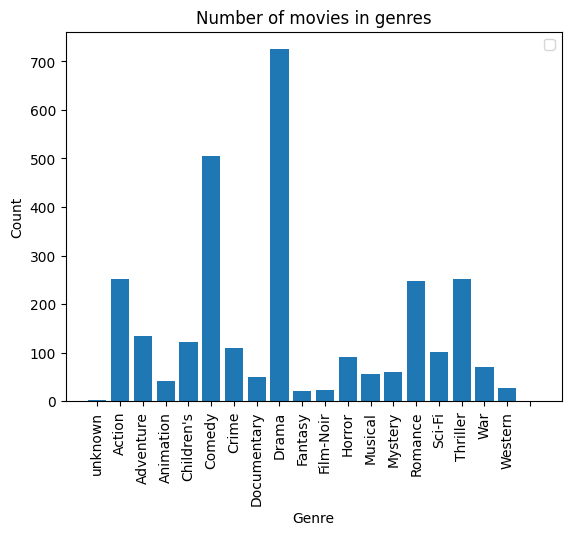

In [120]:
genres = list()
genres_cat2idx = dict()
for item in genre_data:
    item = item[:-1].split('|')
    genres.append(item[0])
    try: genres_cat2idx[item[1]] = item[0]
    except: break

genres_count = [0]*len(genres)
for item in item_data:
    item = item[:-1].split('|')[5:]
    for i in range(19):
        genres_count[i] += int(item[i])


fig, ax = plt.subplots()
ax.bar(genres, genres_count)
ax.set_title("Number of movies in genres")
ax.set(xlabel="Genre", ylabel="Count")
ax.set_xticks(range(20), genres, rotation=90)
ax.legend()
plt.show()